# PREDICTION APPLICATION

# Load data

In [2]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/takue1205/data/main/Mtb%20HSP%2090%20bioactivity_pubChem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-2.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-4.477121
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-4.698970
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-4.698970
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-2.477121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-3.164353
531,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-3.225309
532,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-3.477121
533,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-3.437751


In [15]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
531,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
532,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
533,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Y = dataset.iloc[:,-1]
Y

0     -2.000000
1     -4.477121
2     -4.698970
3     -4.698970
4     -2.477121
         ...   
530   -3.164353
531   -3.225309
532   -3.477121
533   -3.437751
534   -3.772322
Name: pIC50, Length: 535, dtype: float64

# Remove low variance features

In [18]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP805,PubchemFP819,PubchemFP821
0,0,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,0,1,1,1,...,0,1,0,0,1,0,0,0,0,0
2,1,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
3,1,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,1,0,1,0,1,1,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,1,0,1,1,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,1,1
531,1,0,1,1,0,1,0,0,1,1,...,0,1,0,1,0,1,1,0,1,1
532,1,0,1,1,0,1,0,0,1,1,...,0,1,0,1,0,1,1,0,1,1
533,1,0,1,1,1,0,0,1,1,1,...,0,1,0,1,0,1,1,0,1,1


In [25]:
from sklearn.decomposition import PCA

# Create an instance of PCA with the desired number of components
pca = PCA(n_components=270)

# Fit PCA on your data
pca.fit(X)

# Transform your data to the reduced dimension
X_reduced = pca.transform(X)

In [26]:
X.to_csv('descriptor_list.csv', index = False)

# Random Forest Regression Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9118943062945369

# MODEL PREDICTION

In [29]:
Y_pred = model.predict(X)
Y_pred

array([-2.1796941 , -4.22195376, -4.57198567, -4.57198567, -2.54985586,
       -2.50227635, -2.1796941 , -2.50227635, -1.71274151, -2.22397891,
       -1.71274151, -4.34857452, -2.1505448 , -1.6229394 , -1.63109438,
       -1.63109438, -2.08734345, -3.24388176, -4.22990142, -2.1796941 ,
       -2.14110138, -2.04097495, -2.22397891, -2.15744502, -2.18657388,
       -2.10462762, -1.78726117, -1.70136595, -1.53944765, -1.52019255,
       -1.1860408 , -1.9202905 , -2.46908384, -2.70349242, -3.00039169,
       -2.95776637, -1.738321  , -3.33721967, -4.08761627, -1.92601325,
       -1.92601325, -2.48205434, -1.99325935, -1.63109438, -3.34364611,
       -1.63013432, -1.75370602, -1.8907599 , -1.84786692, -1.8075188 ,
       -1.8907599 , -1.94091188, -1.82062869, -1.88001047, -2.06810483,
       -1.95011377, -1.8907599 , -2.65314839, -2.19120002, -2.68094682,
       -2.63233366, -2.65314839, -3.25639811, -3.81225805, -3.32408861,
       -4.83151332, -5.29495225, -5.36705735, -5.27198113, -4.42

# Data Visualization (Experimental vs Predicted pIC50 for Training Data)¶

In [30]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

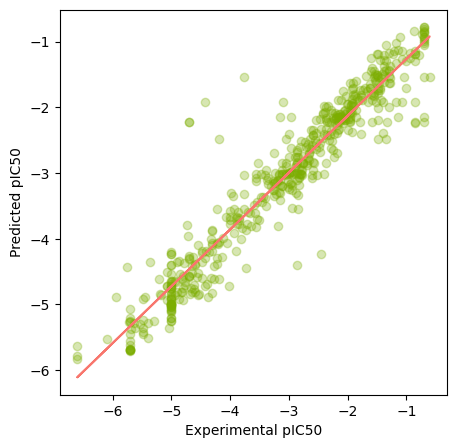

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as a joblib

In [35]:
import joblib

In [36]:
joblib.dump(model, 'Mtb_HSP90_model.joblib')

['Mtb_HSP90_model.joblib']